# Spotify Music Genre Analysis and Prediction Using Musical Features

## Business Problem: Analyzing how musical features vary by genre in order to improve the accuracy and reliability of music classification systems ##
**Reliable music classifcation systems help to improve user experience, make personalized reccomendations, curate music, and perform accurate market analyses**

### The Data ###

- The first dataset pulls genre sorted playlists from Spotify 
- The second dataset for this project was sourced from Spotify's music database, comprising over 40,000 songs with detailed audio features.

In [4]:
# ingest data & import necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df_playlists = pd.read_csv(r"C:\Users\jules_7owst96\code\Grand Circus\Week6\da_project_spotify_data\da_project_spotify_data\playlists.csv")
df_playlists.head()

,Playlist,Genre
0,19WuHd4MxWLzE1fpMmw4S4,Dark Trap
1,6XyR8uzgkSoDzHuOxxRtLH,Dark Trap
2,37Ij3ofyhvEhFEH8YZMZ2X,Dark Trap
3,07zTlfPpsxeoWdumbkNWMI,Dark Trap
4,2dClSRLsnptdkDQnpi5H2f,Dark Trap


In [5]:
# check for duplicates

df_playlists.duplicated().sum()

0

In [6]:
# categorize new playlists based off genre

df_playlists['Genre Playlist']= df_playlists['Genre'] + ' Playlist'
df_playlists.head()


,Playlist,Genre,Genre Playlist
0,19WuHd4MxWLzE1fpMmw4S4,Dark Trap,Dark Trap Playlist
1,6XyR8uzgkSoDzHuOxxRtLH,Dark Trap,Dark Trap Playlist
2,37Ij3ofyhvEhFEH8YZMZ2X,Dark Trap,Dark Trap Playlist
3,07zTlfPpsxeoWdumbkNWMI,Dark Trap,Dark Trap Playlist
4,2dClSRLsnptdkDQnpi5H2f,Dark Trap,Dark Trap Playlist


In [7]:
df_music = pd.read_csv(r"C:\Users\jules_7owst96\code\Grand Circus\Week6\da_project_spotify_data\da_project_spotify_data\genres_v2.csv", low_memory=False)
df_music.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name,Unnamed: 0,title
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,...,2Vc6NJ9PW9gD9q343XFRKx,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...,https://api.spotify.com/v1/audio-analysis/2Vc6...,124539,4,Dark Trap,Mercury: Retrograde,NaN,NaN
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,...,7pgJBLVz5VmnL7uGHmRj6p,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...,https://api.spotify.com/v1/audio-analysis/7pgJ...,224427,4,Dark Trap,Pathology,NaN,NaN
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,...,0vSWgAlfpye0WCGeNmuNhy,spotify:track:0vSWgAlfpye0WCGeNmuNhy,https://api.spotify.com/v1/tracks/0vSWgAlfpye0...,https://api.spotify.com/v1/audio-analysis/0vSW...,98821,4,Dark Trap,Symbiote,NaN,NaN
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,...,0VSXnJqQkwuH2ei1nOQ1nu,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...,https://api.spotify.com/v1/audio-analysis/0VSX...,123661,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote),NaN,NaN
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,...,4jCeguq9rMTlbMmPHuO7S3,spotify:track:4jCeguq9rMTlbMmPHuO7S3,https://api.spotify.com/v1/tracks/4jCeguq9rMTl...,https://api.spotify.com/v1/audio-analysis/4jCe...,123298,4,Dark Trap,Venom,NaN,NaN


In [8]:
df_music.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42305 entries, 0 to 42304
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      42305 non-null  float64
 1   energy            42305 non-null  float64
 2   key               42305 non-null  int64  
 3   loudness          42305 non-null  float64
 4   mode              42305 non-null  int64  
 5   speechiness       42305 non-null  float64
 6   acousticness      42305 non-null  float64
 7   instrumentalness  42305 non-null  float64
 8   liveness          42305 non-null  float64
 9   valence           42305 non-null  float64
 10  tempo             42305 non-null  float64
 11  type              42305 non-null  object 
 12  id                42305 non-null  object 
 13  uri               42305 non-null  object 
 14  track_href        42305 non-null  object 
 15  analysis_url      42305 non-null  object 
 16  duration_ms       42305 non-null  int64 

In [9]:
df_music.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,Unnamed: 0
count,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,20780.000000
mean,0.639364,0.762516,5.370240,-6.465442,0.549462,0.136561,0.096160,0.283048,0.214079,0.357101,147.474056,250865.846685,3.972580,10483.970645
std,0.156617,0.183823,3.666145,2.941165,0.497553,0.126168,0.170827,0.370791,0.175576,0.233200,23.844623,102957.713571,0.268342,6052.359519
min,0.065100,0.000243,0.000000,-33.357000,0.000000,0.022700,0.000001,0.000000,0.010700,0.018700,57.967000,25600.000000,1.000000,0.000000
25%,0.524000,0.632000,1.000000,-8.161000,0.000000,0.049100,0.001730,0.000000,0.099600,0.161000,129.931000,179840.000000,4.000000,5255.750000
50%,0.646000,0.803000,6.000000,-6.234000,1.000000,0.075500,0.016400,0.005940,0.135000,0.322000,144.973000,224760.000000,4.000000,10479.500000
75%,0.766000,0.923000,9.000000,-4.513000,1.000000,0.193000,0.107000,0.722000,0.294000,0.522000,161.464000,301133.000000,4.000000,15709.250000
max,0.988000,1.000000,11.000000,3.148000,1.000000,0.946000,0.988000,0.989000,0.988000,0.988000,220.290000,913052.000000,5.000000,20999.000000


In [10]:
# Due to large sum of nulls in song_name, Unnamed:0, and title, combined and dropped columns

# Convert Unnamed: 0 to string
df_music['Unnamed: 0'] = df_music['Unnamed: 0'].fillna('').astype(str)

# Combine Unnamed: 0 and title columns
combined_names = df_music['Unnamed: 0'].fillna('') + ' ' + df_music['title'].fillna('')

# Update song_name column with combined names
df_music['song_name'] = df_music['song_name'].fillna(combined_names)

# Drop Unnamed: 0 and title columns 
df_music.drop(['Unnamed: 0', 'title'], axis=1, inplace=True)

df_music.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,156.985,audio_features,2Vc6NJ9PW9gD9q343XFRKx,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...,https://api.spotify.com/v1/audio-analysis/2Vc6...,124539,4,Dark Trap,Mercury: Retrograde
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,115.080,audio_features,7pgJBLVz5VmnL7uGHmRj6p,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...,https://api.spotify.com/v1/audio-analysis/7pgJ...,224427,4,Dark Trap,Pathology
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,218.050,audio_features,0vSWgAlfpye0WCGeNmuNhy,spotify:track:0vSWgAlfpye0WCGeNmuNhy,https://api.spotify.com/v1/tracks/0vSWgAlfpye0...,https://api.spotify.com/v1/audio-analysis/0vSW...,98821,4,Dark Trap,Symbiote
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,186.948,audio_features,0VSXnJqQkwuH2ei1nOQ1nu,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...,https://api.spotify.com/v1/audio-analysis/0VSX...,123661,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote)
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,147.988,audio_features,4jCeguq9rMTlbMmPHuO7S3,spotify:track:4jCeguq9rMTlbMmPHuO7S3,https://api.spotify.com/v1/tracks/4jCeguq9rMTl...,https://api.spotify.com/v1/audio-analysis/4jCe...,123298,4,Dark Trap,Venom


In [11]:
# checking nulls after combining and dropping 
df_music.isna().sum()

danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
type                0
id                  0
uri                 0
track_href          0
analysis_url        0
duration_ms         0
time_signature      0
genre               0
song_name           0
dtype: int64

In [12]:
# check duplicated
df_music.duplicated().sum()

0

In [13]:
# Decide what columns to keep based on if they could affect genre of music

musical_columns = ['danceability', 'energy', 'key', 'loudness', 'mode', 
                   'speechiness', 'acousticness', 'instrumentalness', 
                   'liveness', 'valence', 'tempo', 'duration_ms', 
                   'time_signature', 'genre']

# replacing df of columns we want for analysis 
df_music = df_music[musical_columns]
df_music.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42305 entries, 0 to 42304
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      42305 non-null  float64
 1   energy            42305 non-null  float64
 2   key               42305 non-null  int64  
 3   loudness          42305 non-null  float64
 4   mode              42305 non-null  int64  
 5   speechiness       42305 non-null  float64
 6   acousticness      42305 non-null  float64
 7   instrumentalness  42305 non-null  float64
 8   liveness          42305 non-null  float64
 9   valence           42305 non-null  float64
 10  tempo             42305 non-null  float64
 11  duration_ms       42305 non-null  int64  
 12  time_signature    42305 non-null  int64  
 13  genre             42305 non-null  object 
dtypes: float64(9), int64(4), object(1)
memory usage: 4.5+ MB


In [14]:
# checking the numeric column types so we can apply outlier function
df_numeric = df_music.select_dtypes(include='number').columns.to_list()
df_numeric

['danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'duration_ms',
 'time_signature']

In [15]:
# check for outliers 

import statistics as stats

# outlier function
def outliers_IQR (column):
    Q1 = column.quantile(.25)
    Q3 = column.quantile(.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    outliers = (column < lower_bound) | (column > upper_bound)
    return outliers 

df_outliers = df_music.select_dtypes(include=['number']).apply(outliers_IQR)
df_outliers.sum()

danceability          45
energy               139
key                    0
loudness             796
mode                   0
speechiness         1918
acousticness        5149
instrumentalness       0
liveness            2496
valence                0
tempo                532
duration_ms         1220
time_signature      1878
dtype: int64

**With musical features holding a large range of variability, the outliers are not discarded**

## Initial Logistic Regression ##
### Can we predict the genre of a song based on its musical features?

In [47]:
# import libraries

from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [17]:
# split into train and test set
X = df_music[['danceability', 'energy', 'key', 'loudness', 'mode', 
                   'speechiness', 'acousticness', 'instrumentalness', 
                   'liveness', 'valence', 'tempo', 'duration_ms', 
                   'time_signature']]

y = df_music['genre']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=10000)
model.fit(X_train, y_train)

# Predictions 
y_pred = model.predict(X_test)

# evaluate model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# classification report
print(f'Classification Report {classification_report(y_test, y_pred, zero_division=0)}')

Accuracy: 0.22834180356931805
Classification Report                  precision    recall  f1-score   support

      Dark Trap       0.11      0.16      0.13       970
            Emo       0.00      0.00      0.00       341
         Hiphop       0.00      0.00      0.00       621
            Pop       0.00      0.00      0.00        98
            Rap       0.00      0.00      0.00       341
            RnB       0.00      0.00      0.00       396
     Trap Metal       0.00      0.00      0.00       384
Underground Rap       0.28      0.69      0.40      1192
            dnb       0.17      0.55      0.26       599
      hardstyle       0.00      0.00      0.00       619
      psytrance       0.34      0.95      0.50       598
      techhouse       0.06      0.00      0.01       568
         techno       0.00      0.00      0.00       590
         trance       0.11      0.10      0.10       562
           trap       0.00      0.00      0.00       582

       accuracy                   

### How Can we Improve Accuracy?
After receiving an initial accuracy of 22.8% in our regression model, we decided to reclassify(bucket) our original 15 genre categories into 4 broader categories based on their similarities in rhythmic structures, lyrical themes, and melodies.

New Categories:

- Trap/Rap/Hiphop: These genres share common rhythmic structures and lyrical themes.
- R&B/Pop: Both genres are heavily focused on melody.
- Electronic/Techno/Dance: These genres are characterized by beat-driven melodies with high energy.
- Emo: This genre was kept as its own category due to its distinct features in instrumentalization and lyrical themes.

This reclassification helped us better capture the unique characteristics of each genre group, leading to a more accurate prediction model.

In [19]:
# make a new column of general genres and move original genres into their new 'bucket' genre
df_music['general_genre']= df_music['genre'].replace({'Dark Trap': 'Trap/Rap/Hiphop',
                                                       'Underground Rap': 'Trap/Rap/Hiphop',
                                                       'Trap Metal': 'Trap/Rap/Hiphop',
                                                       'Rap': 'Trap/Rap/Hiphop',
                                                       'trap': 'Trap/Rap/Hiphop',
                                                       'Hiphop': 'Trap/Rap/Hiphop',
                                                      'RnB': 'R&B/Pop',
                                                      'Pop': 'R&B/Pop',
                                                    'techhouse': 'EDM',
                                                      'techno': 'EDM',
                                                      'trance': 'EDM',
                                                      'psytrance': 'EDM',
                                                      'dnb': 'EDM',
                                                      'hardstyle': 'EDM'})

# check
df_music.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,genre,general_genre
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,156.985,124539,4,Dark Trap,Trap/Rap/Hiphop
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,115.080,224427,4,Dark Trap,Trap/Rap/Hiphop
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,218.050,98821,4,Dark Trap,Trap/Rap/Hiphop
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,186.948,123661,3,Dark Trap,Trap/Rap/Hiphop
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,147.988,123298,4,Dark Trap,Trap/Rap/Hiphop


## Second Logistic Regression: Improving Accuracy ##
Using the visualizations created in PowerBI and the conclusions drawn from them, we excluded irrelevant and skewed columns from the test set. Specifically, the columns "mode," "key," "duration_ms," and "time_signature" were removed. This step helped streamline the dataset and improve the accuracy of our predictions.

In [20]:
# split into train and test set
X = df_music[['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']]

y = df_music['general_genre']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=10000)
model.fit(X_train, y_train)

# Predictions 
y_pred = model.predict(X_test)

# evaluate model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# classification report
print(f'Classification Report {classification_report(y_test, y_pred, zero_division=0)}')

Accuracy: 0.7708308710554308
Classification Report                  precision    recall  f1-score   support

            EDM       0.80      0.84      0.82      3536
            Emo       0.49      0.24      0.33       341
        R&B/Pop       0.44      0.08      0.14       494
Trap/Rap/Hiphop       0.77      0.83      0.80      4090

       accuracy                           0.77      8461
      macro avg       0.62      0.50      0.52      8461
   weighted avg       0.75      0.77      0.75      8461



**Test prediction model with 'Underground Rap' song**

In [25]:
# outcome should be trap/rap/hiphop b/c values from an unerground rap song were entered. Accuracy is high at 80%

new_music_measures_rap = [[0.876, 0.658, -3.119, 0.106, 0.12, 0, 0.107, 0.407, 159.986]]
predicted_output = model.predict(new_music_measures_rap)
predicted_output

C:\Users\jules_7owst96\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array(['Trap/Rap/Hiphop'], dtype=object)

**Test prediction model using 'Emo' song**

In [26]:
# outcome should be emo, but this is a low sample size so accuracy is only 33%

new_music_measures_emo = [[0.374, 0.892, -4.143, 0.0464, 0.000121, 3.01E-06, 0.128, 0.241, 159.784]]
predicted_output = model.predict(new_music_measures_emo)
predicted_output

C:\Users\jules_7owst96\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array(['EDM'], dtype=object)

**Test prediction model using 'Pop' song**

In [27]:
# outcome should be R&B/Pop , but this is a low sample size and accuracy is low at 14%

new_music_measures_pop = [[0.835, 0.626, -5.833, 0.125, 0.0589, 6.0E-05, 0.396, 0.35, 182.06]]
predicted_output = model.predict(new_music_measures_pop)
predicted_output

C:\Users\jules_7owst96\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array(['Trap/Rap/Hiphop'], dtype=object)

**Test prediction model for 'techno'**

In [28]:
# should predict EDM, especially with our accuracy at 82%

new_music_measures_tech = [[0.777, 0.872, -11.191, 0.0941, 0.0601, 0.947, 0.103, 0.366, 137.991]]
predicted_output = model.predict(new_music_measures_tech)
predicted_output

C:\Users\jules_7owst96\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array(['EDM'], dtype=object)

# Visualizations #

**Confusion Matrix**

In [29]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[2986,   44,    2,  504],
       [ 119,   83,   20,  119],
       [  23,   12,   41,  418],
       [ 618,   30,   30, 3412]], dtype=int64)

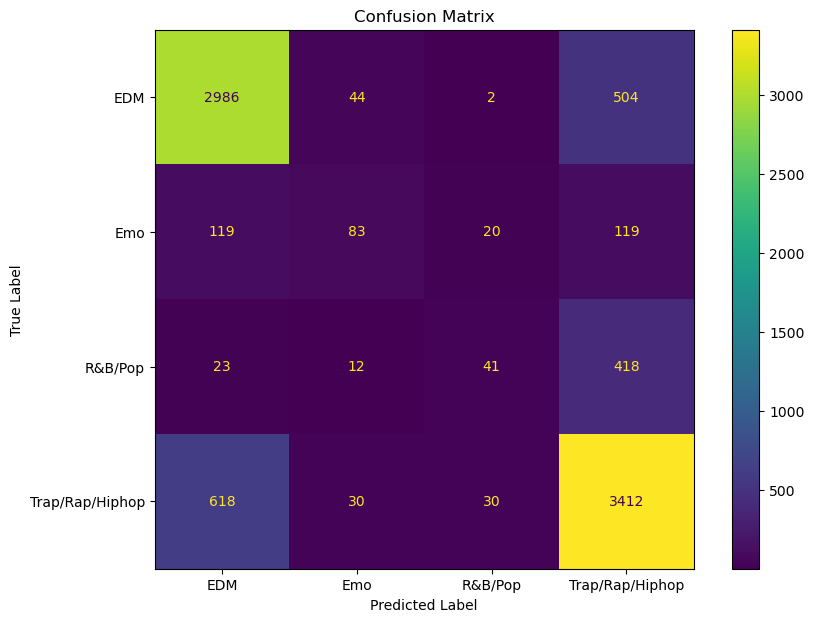

In [30]:
# Define labels
labels = ['EDM', 'Emo', 'R&B/Pop', 'Trap/Rap/Hiphop']
# looking at true false, false negatives etc. 

cm_disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

fig, ax = plt.subplots(figsize=(10, 7))
cm_disp.plot(cmap='viridis', ax=ax, values_format='d')

# Set plot title
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.show()

### Interpretation of the Confusion Matrix
**EDM:**

- Correctly classified as EDM: 2986
- Misclassified as Emo: 44
- Misclassified as R&B/Pop: 2
- Misclassified as Trap/Rap/Hiphop: 504

**Emo:**

- Correctly classified as Emo: 83
- Misclassified as EDM: 119
- Misclassified as R&B/Pop: 20
- Misclassified as Trap/Rap/Hiphop: 119

**R&B/Pop:**

- Correctly classified as R&B/Pop: 41
- Misclassified as EDM: 23
- Misclassified as Emo: 12
- Misclassified as Trap/Rap/Hiphop: 418

**Trap/Rap/Hiphop:**

- Correctly classified as Trap/Rap/Hiphop: 3412
- Misclassified as EDM: 618
- Misclassified as Emo: 30
- Misclassified as R&B/Pop: 30

**Genre Count**

In [31]:
# genre samples as percent of our dataframe 
df_music['general_genre'].value_counts(normalize=True)*100

general_genre
Trap/Rap/Hiphop    47.918686
EDM                42.058858
R&B/Pop             6.051294
Emo                 3.971162
Name: proportion, dtype: float64

**Visual of Genre Count**

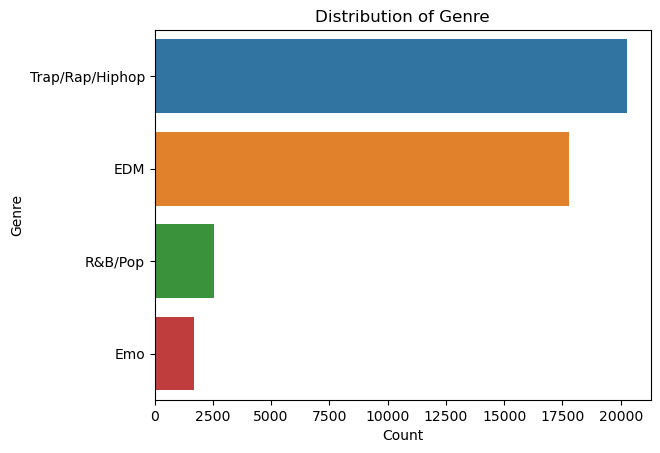

In [46]:
genre_count = df_music['general_genre'].value_counts()

sns.barplot(x=genre_count.values, y=genre_count.index)
plt.title('Distribution of Genre')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

This Distribution of Genre graph shows a heavy imbalance amongst the Genre distribution, with data falling primarily under Trap/Rap/Hiphop and EDM music, impacting the accuracy and reliability of R&B/Pop and Emo results.

### Exploring the Relationship Between Danceability and Energy by Genre ###

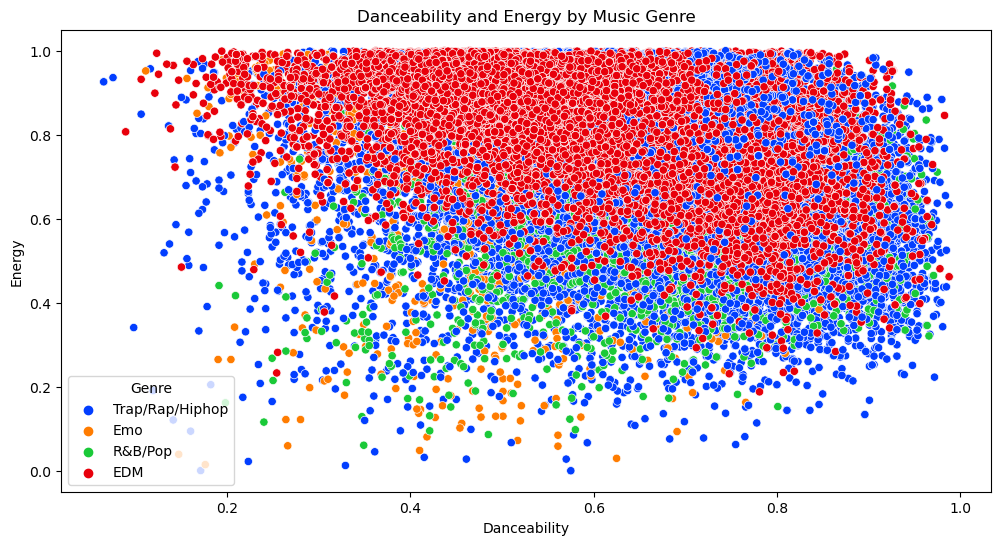

In [34]:
plt.figure(figsize=(12,6))
sns.scatterplot(data = df_music, x='danceability', y='energy', hue='general_genre', palette='bright')
plt.title('Danceability and Energy by Music Genre')
plt.xlabel('Danceability')
plt.ylabel('Energy')
plt.legend(title='Genre')
plt.show()


EDM is the most culstered with high rates of energy and fairly high rates of danceability.
Trap/Rap/Hiphop displayes the widest range, but  holds the highest data point for both high energy and danceability.


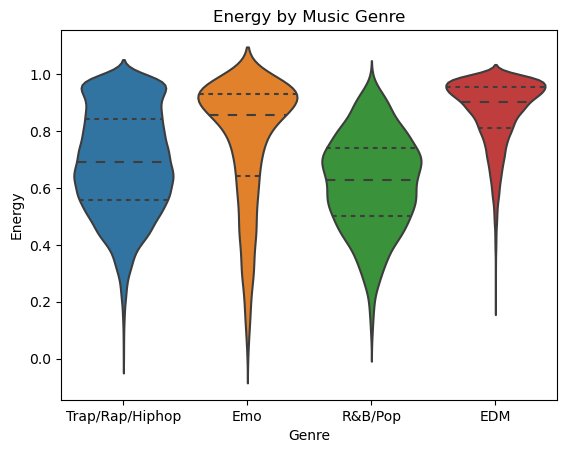

In [35]:
sns.violinplot(data=df_music, x='general_genre', y='energy', scale='width', inner='quartile')
plt.title('Energy by Music Genre')
plt.xlabel('Genre')
plt.ylabel('Energy')
plt.show()

 
Trap/Rap/Hiphop and R&B/Pop demonstrate the widest range.
Emo and EDM are primarily clustered in high energy, but Emo's low energy points drag the tail down for a wider range than EDM.

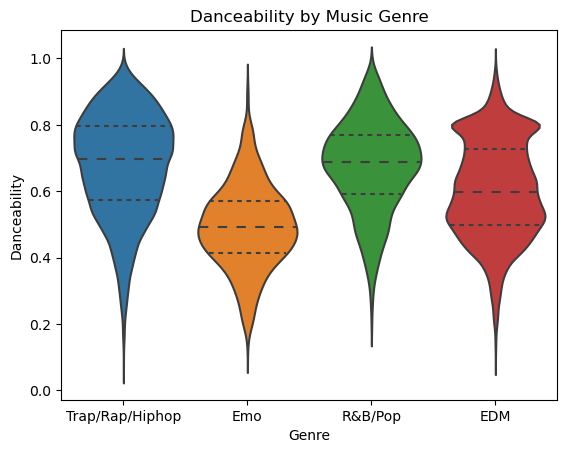

In [36]:
sns.violinplot(data=df_music, x='general_genre', y='danceability', scale='width', inner='quartile')
plt.title('Danceability by Music Genre')
plt.xlabel('Genre')
plt.ylabel('Danceability')
plt.show()

Here, the most drastic differences from 'Energy by Music Genre' are Emo, shifting to a mid range, and EDM, presenting a wider range of danceability.

Trap/Rap/Hiphop and R&B/Pop are similar to ‘Energy by Music Genre’, demonstrating the wide cluster of data points shown in ‘Danceability and Energy by Music Genre’.


### Exploring the Relationship Between Average Valence by Genre ###

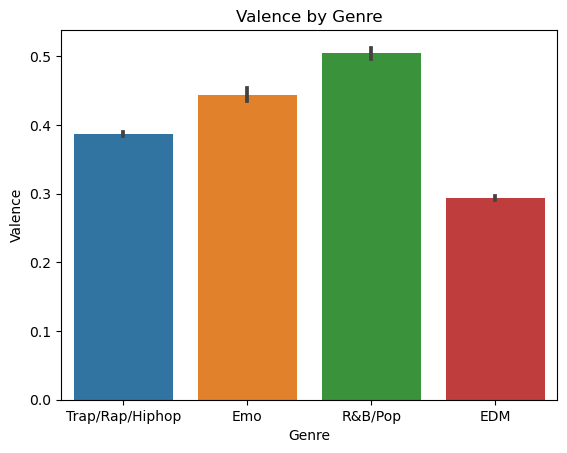

In [37]:
sns.barplot(data = df_music, x='general_genre', y='valence')
plt.title('Valence by Genre')
plt.xlabel('Genre')
plt.ylabel('Valence')
plt.show()

R&B/Pop has the higest valence, with EDM at the lowest

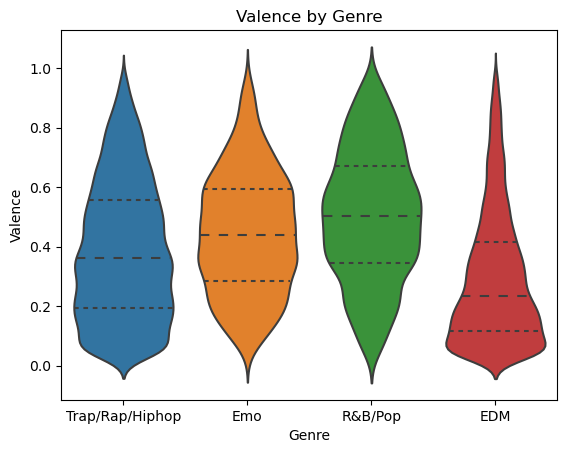

In [38]:
sns.violinplot(data=df_music, x='general_genre', y='valence', scale='width', inner='quartile')
plt.title('Valence by Genre')
plt.xlabel('Genre')
plt.ylabel('Valence')
plt.show()

This violin chart shows a strong emphasis of EDM falling in the lowest range of valence. The most differentiating factors in this graph are the median and quartile lines.

### Exploring Relevance of Tempo within the Data Distribution ###

C:\Users\jules_7owst96\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


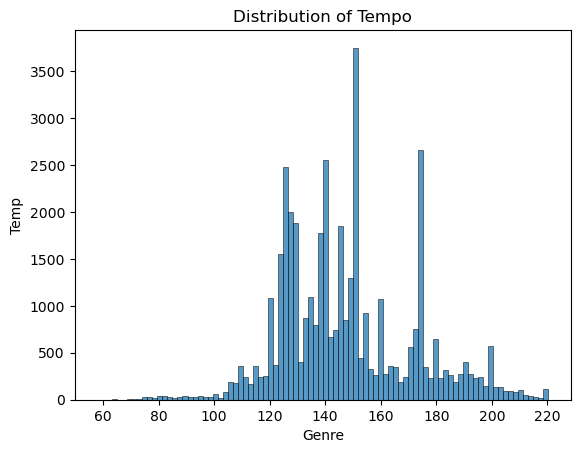

In [39]:
# check ditribution of tempo to for next analysis of tempo and valence relationship

sns.histplot(data=df_music, x="tempo")
plt.title('Distribution of Tempo')
plt.xlabel('Genre')
plt.ylabel('Temp')
plt.show()


Tempo distribution is wide enough to further analyze it's relationship within the data

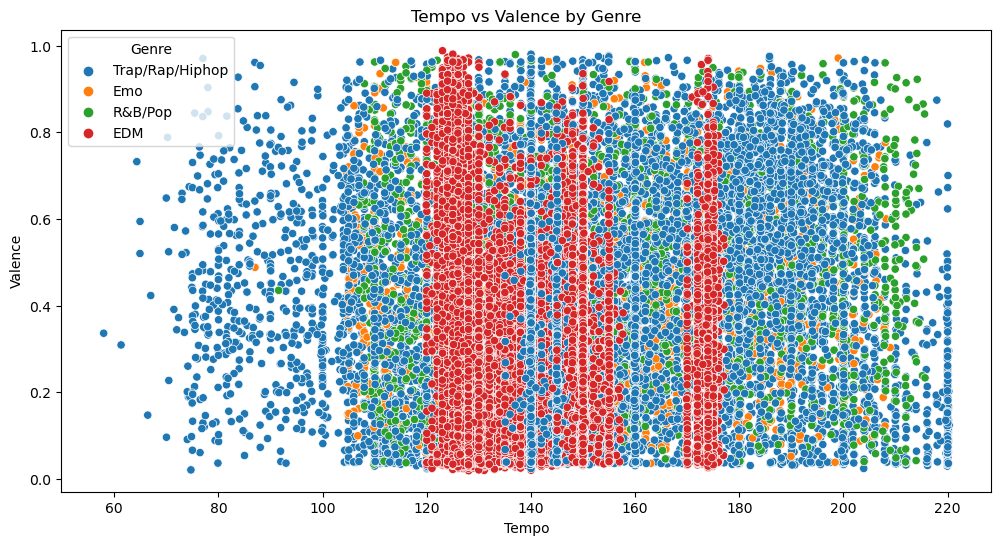

In [40]:
plt.figure(figsize=(12,6))
sns.scatterplot(data = df_music, x='tempo', y='valence',  hue='general_genre')
plt.title('Tempo vs Valence by Genre')
plt.xlabel('Tempo')
plt.ylabel('Valence')
plt.legend(title = 'Genre')
plt.show()


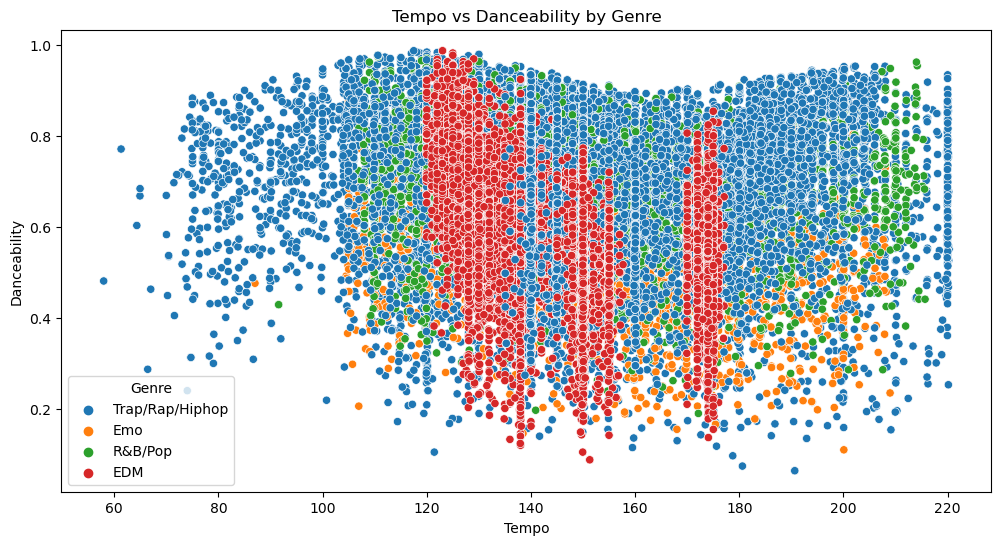

In [41]:
plt.figure(figsize=(12,6))
sns.scatterplot(data = df_music, x='tempo', y='danceability', hue='general_genre')
plt.title('Tempo vs Danceability by Genre')
plt.xlabel('Tempo')
plt.ylabel('Danceability')
plt.legend(title = 'Genre')
plt.show()


These two graphs: ‘Tempo vs Valence by Genre’ and ‘Tempo vs Danceability by Genre’ are very similarly presenting in terms of genre clustering

### Exploring Speechiness by Genre ###

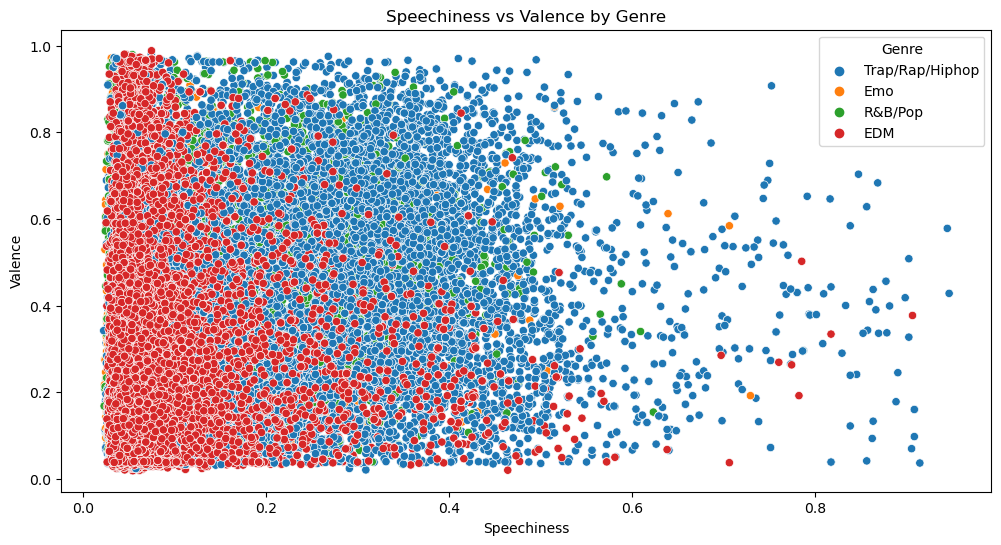

In [42]:
plt.figure(figsize=(12,6))

sns.scatterplot(data = df_music, x='speechiness', y='valence', hue='general_genre')
plt.title('Speechiness vs Valence by Genre')
plt.xlabel('Speechiness')
plt.ylabel('Valence')
plt.legend(title='Genre')
plt.show()

In EDM music, the lower the speechiness, the higher the valence. Whereas, in Trap/Rap/Hiphop, the speechiness does not directly or consistently correlate with valence

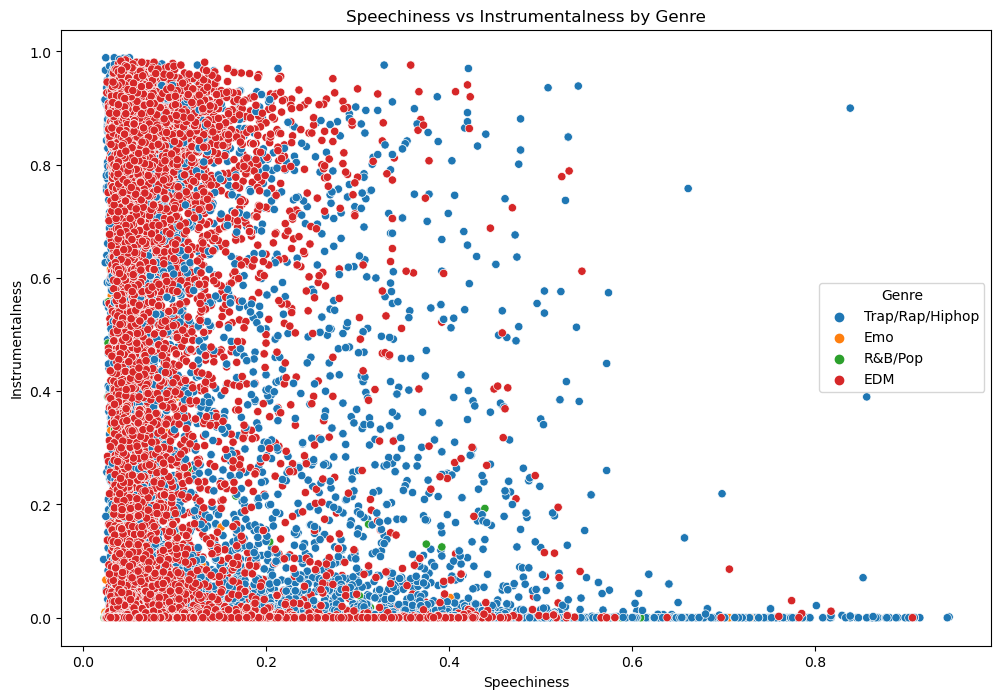

In [43]:
plt.figure(figsize=(12,8))

sns.scatterplot(data = df_music, x='speechiness', y='instrumentalness', hue='general_genre')
plt.title('Speechiness vs Instrumentalness by Genre')
plt.xlabel('Speechiness')
plt.ylabel('Instrumentalness')
plt.legend(title='Genre')
plt.show()

Both EDM and Trap/Rap/Hiphop are widely dispersed across both imstrumentalness and speechiness

**What are people listening to based off our playlist DataFrame?**

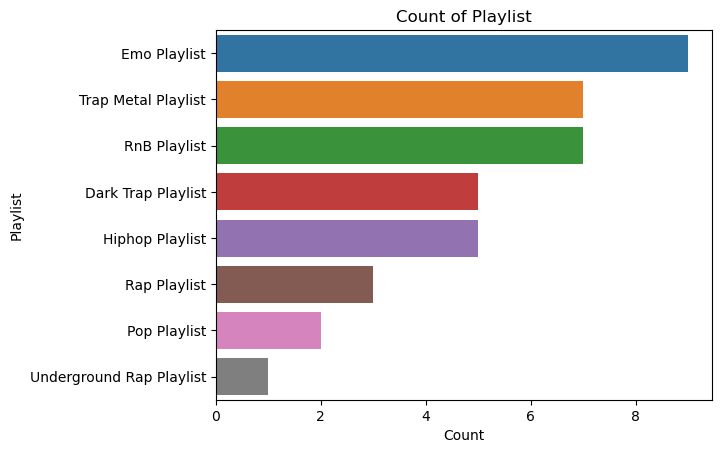

In [45]:
playlist_count = df_playlists['Genre Playlist'].value_counts()

sns.barplot(x=playlist_count.values, y=playlist_count.index)
plt.title('Count of Playlist')
plt.xlabel('Count')
plt.ylabel('Playlist')
plt.show()

The most popular playlist is EMO, and the least popular is Underground Rap

## Conclusion
The analysis revealed distinct trends in musical features across different genres, which were effectively used to build a genre prediction model. Our most influencial musical features were energy, valence, speechiness, instrumentalness, acousticness, tempo, and danceability. The logistic regression model showed a respectable accuracy and is recommended for genre classification. To further enhance the model's performance, especially for less represented genres like Emo and R&B/Pop, future steps include balancing the dataset in order to better represent these under reported genres. Integrating this improved classification model into Spotify's recommendation system can lead to more relevant and satisfying user experiences by ensuring songs are correctly categorized by genre.
